# EDA on the EuroSAT Dataset
The dataset contains satellite images taken from the Sentinel-2 satellite. It 
This study addressed the challenge of land use and land cover classification using Sentinel-2 satellite images. The Sentinel-2 satellite images are openly and freely accessible provided in the Earth observation program Copernicus.<BR><BR><BR>
 <b>Dataset : <b>[EuroSAT Dataset](https://github.com/phelber/EuroSAT)<BR><BR>
![Image](https://github.com/phelber/EuroSAT/raw/master/eurosat_overview_small.jpg?raw=true)


### High Level Outline Outline
1. Image Visualization
2. Statistical Analysis : pixel intensity, color distributions, and image dimensions 
3. Image Metrics Analysis

In [26]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

## 1. Image Visualization

In [10]:
train_df = pd.read_csv('EuroSAT/train.csv')

In [24]:
def get_Sample(df, num_imgs):
    img_sample = {}
    for cls in df.ClassName.unique():
        sample = df[df['ClassName']==cls].sample(num_imgs)['Filename']
        img_sample[cls] = sample.values
    return img_sample

img_sample = get_Sample(train_df, 9)

Img Label : AnnualCrop


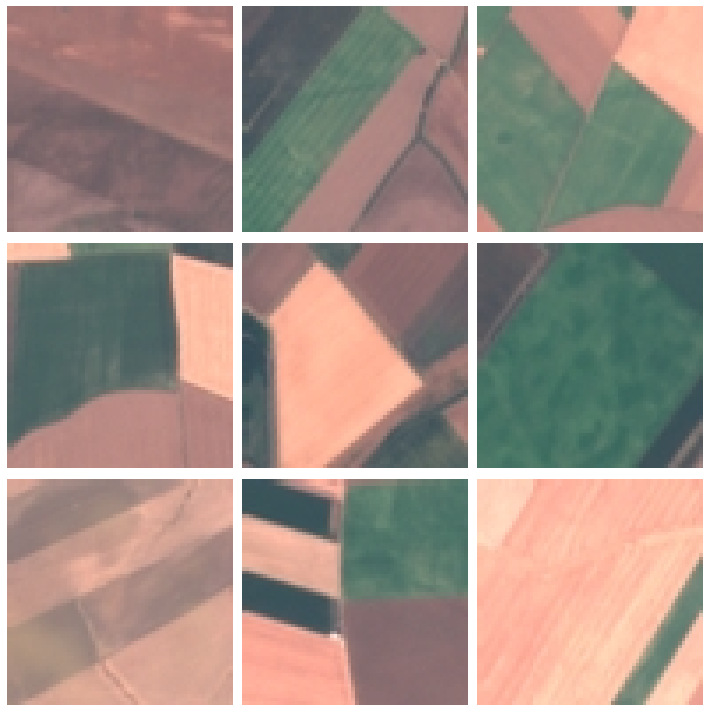

Img Label : HerbaceousVegetation


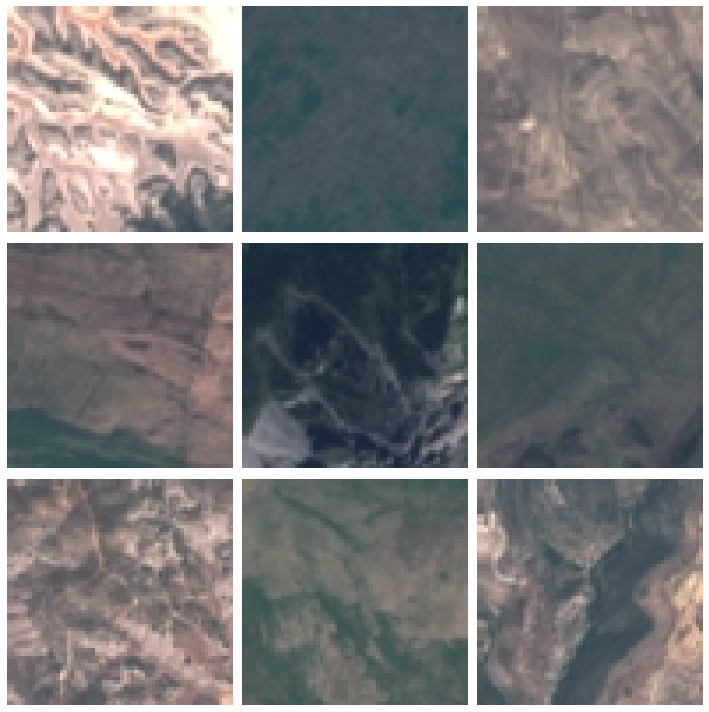

Img Label : PermanentCrop


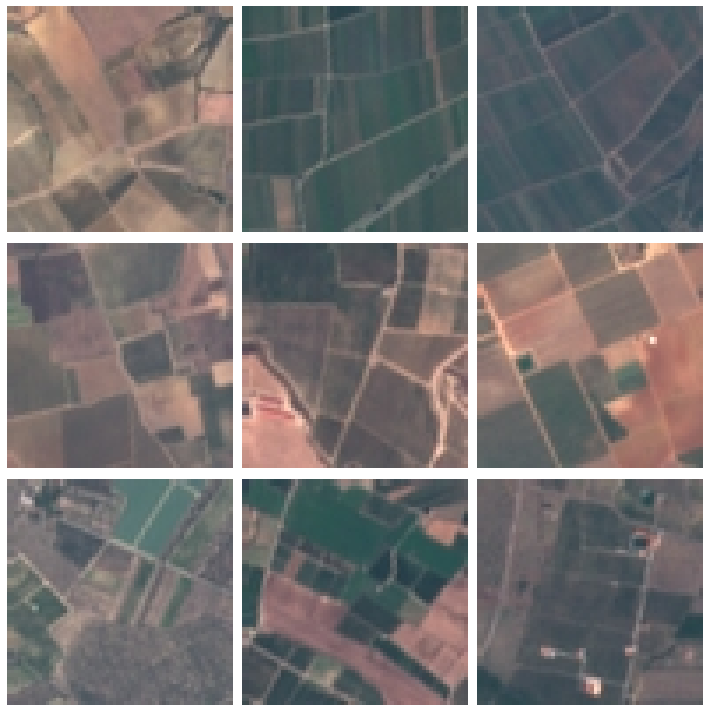

Img Label : Industrial


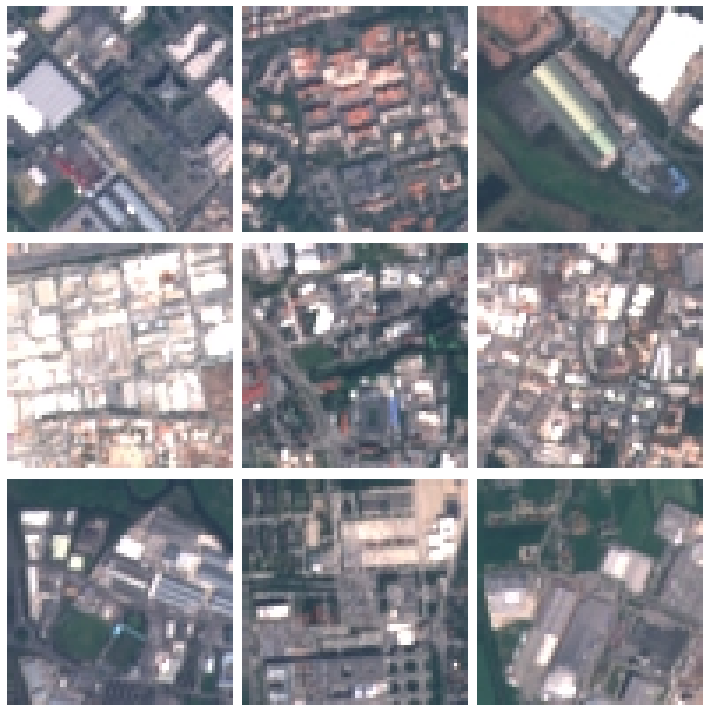

Img Label : Pasture


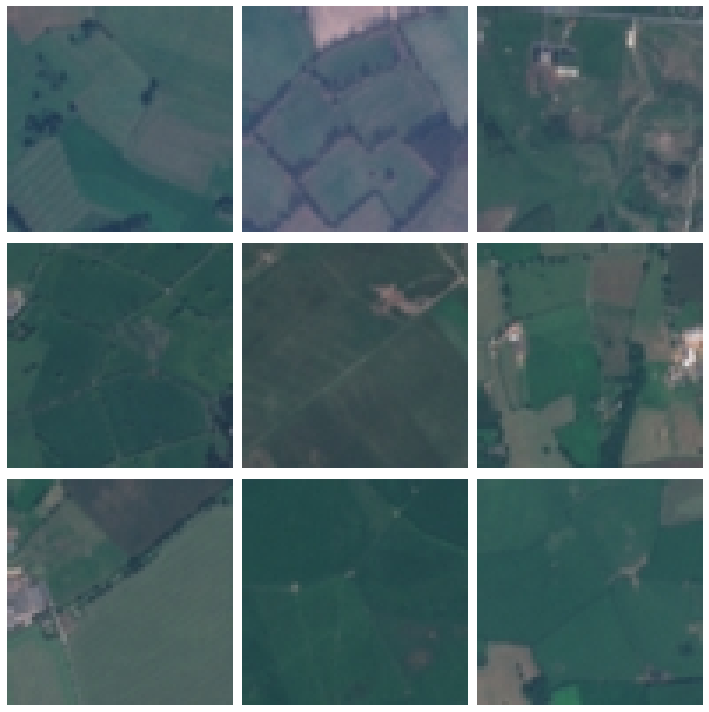

Img Label : Highway


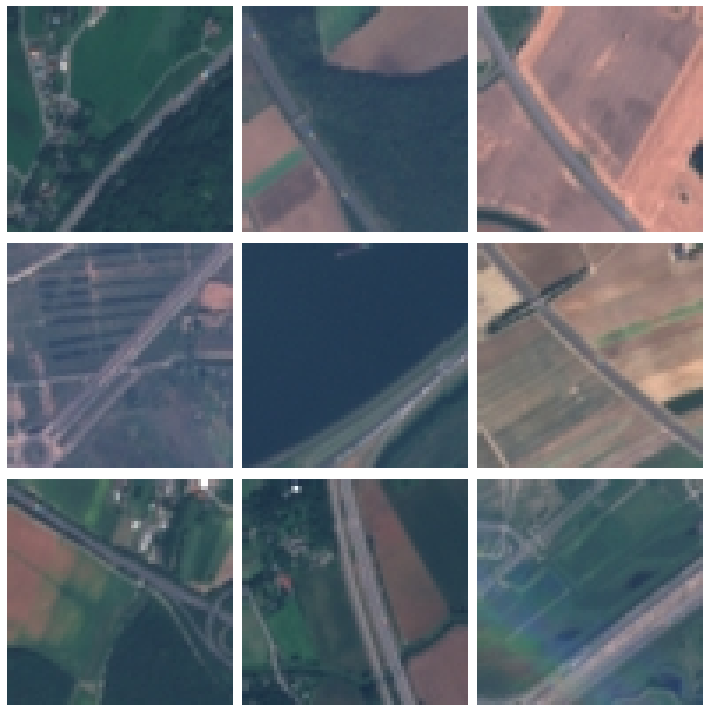

Img Label : Residential


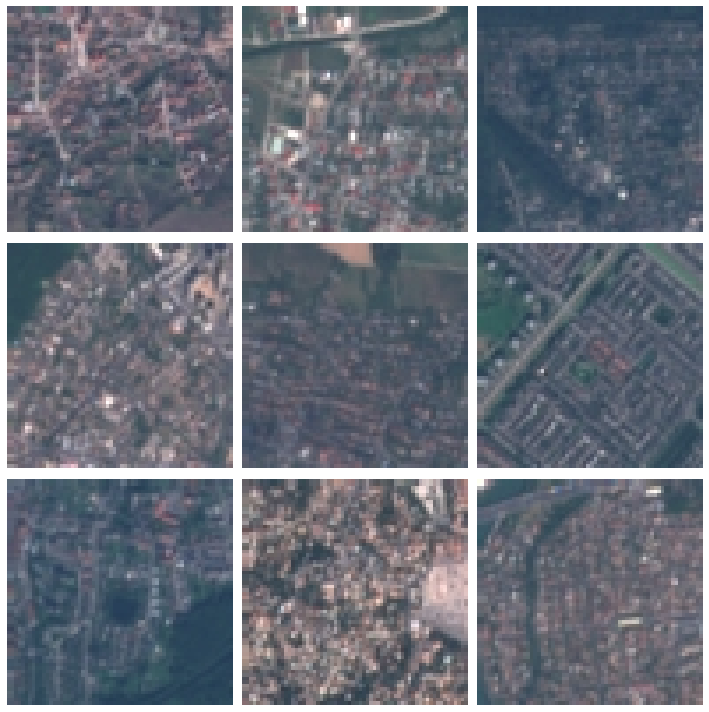

Img Label : River


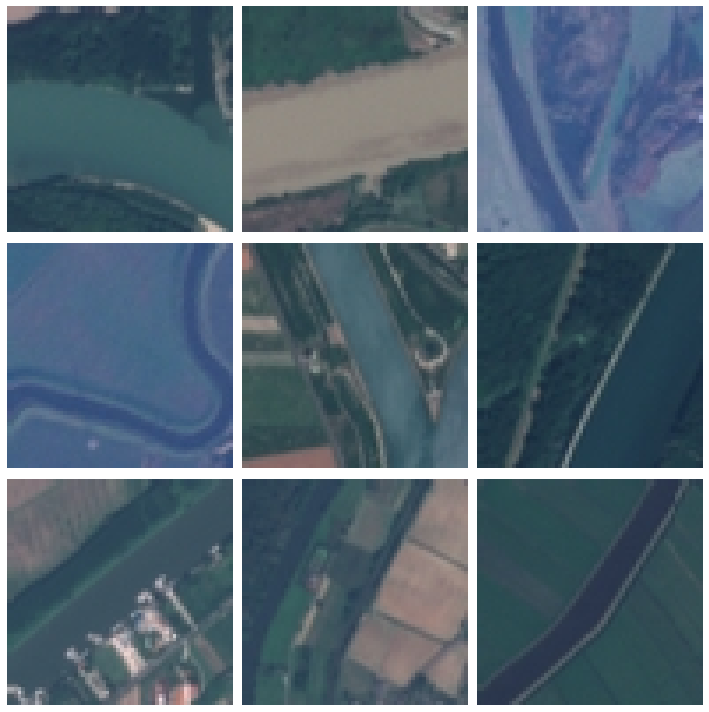

Img Label : SeaLake


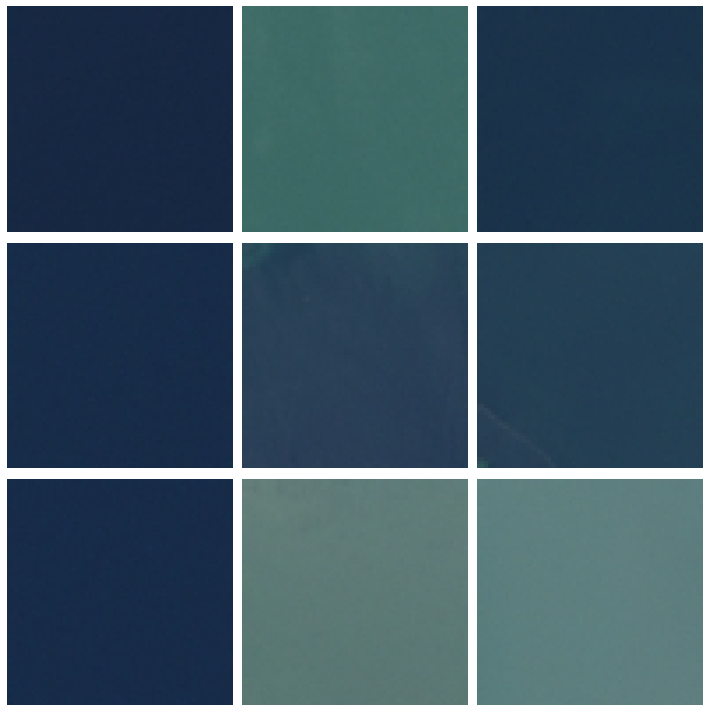

Img Label : Forest


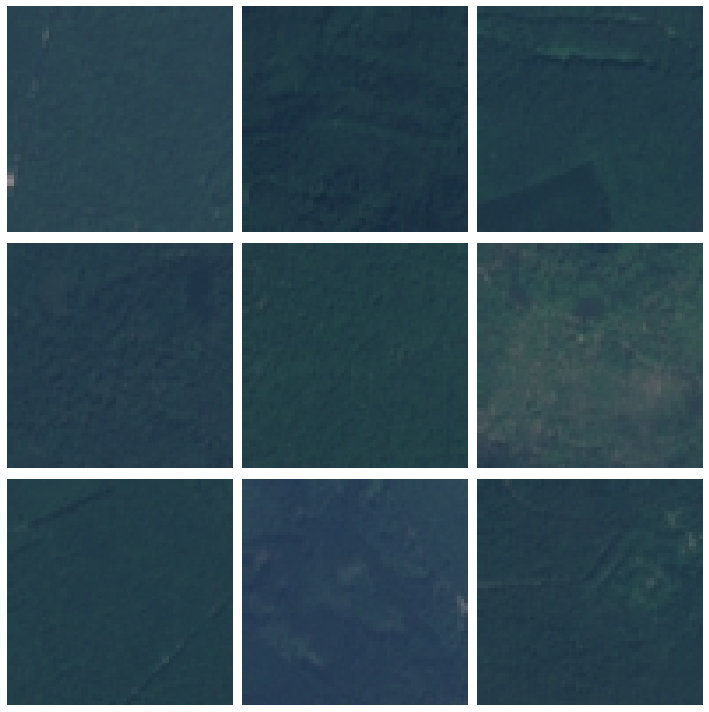

In [25]:
def plot_img_sample(img_path:dict, root_path:str, verbose=1):
    for cls in img_path.keys():
        # Load images
        if verbose == 1:
            print(f"Img Label : {cls}")
        images = [Image.open(root_path+path) for path in img_path[cls]]

        # Plotting
        fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Adjust figure size as needed

        for i, ax in enumerate(axes.flat):
            if i < len(images):
                ax.imshow(images[i])
                ax.axis('off')

        plt.tight_layout()
        plt.show()

plot_img_sample(img_sample, "EuroSAT/")


## 2. Statistical Analysis

- 

Image Label : AnnualCrop


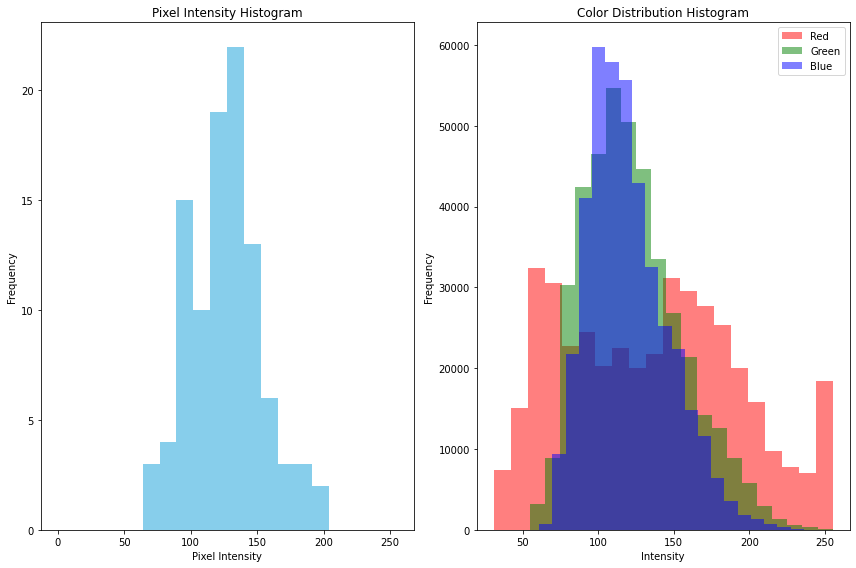

Image Label : HerbaceousVegetation


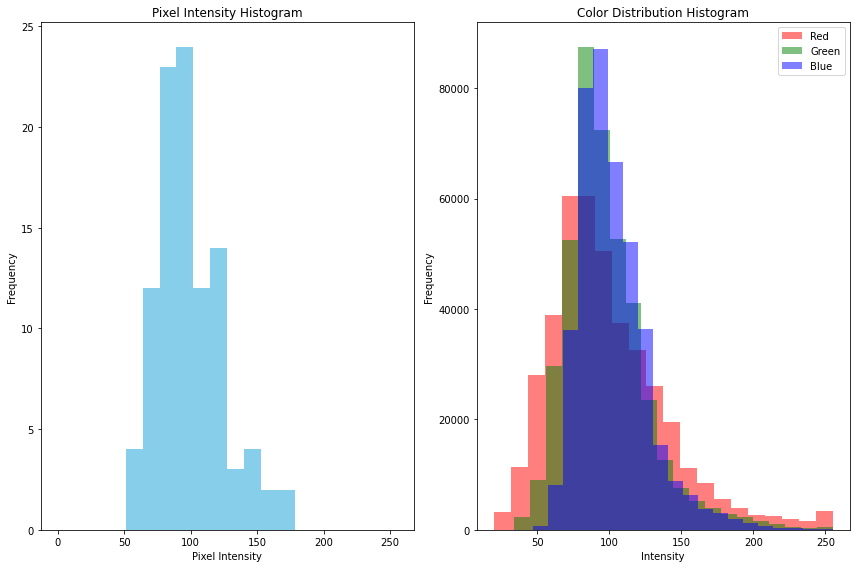

Image Label : PermanentCrop


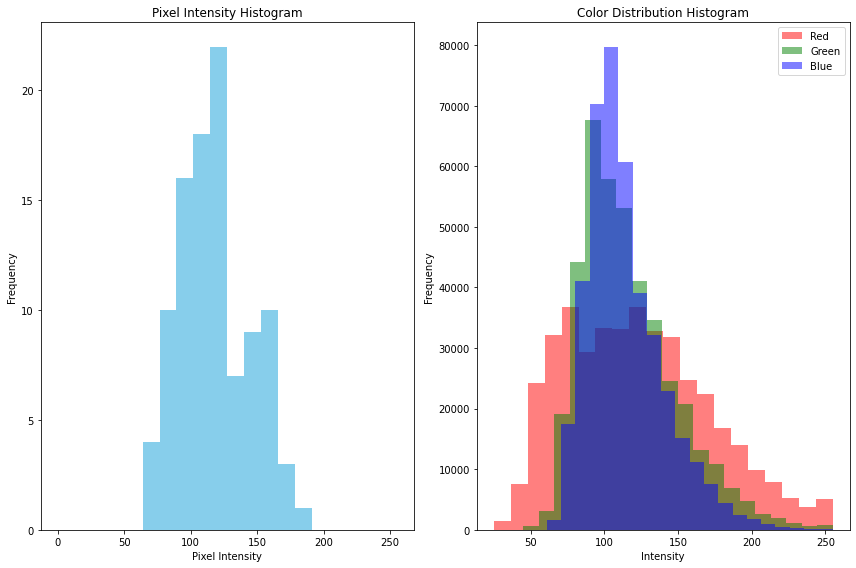

Image Label : Industrial


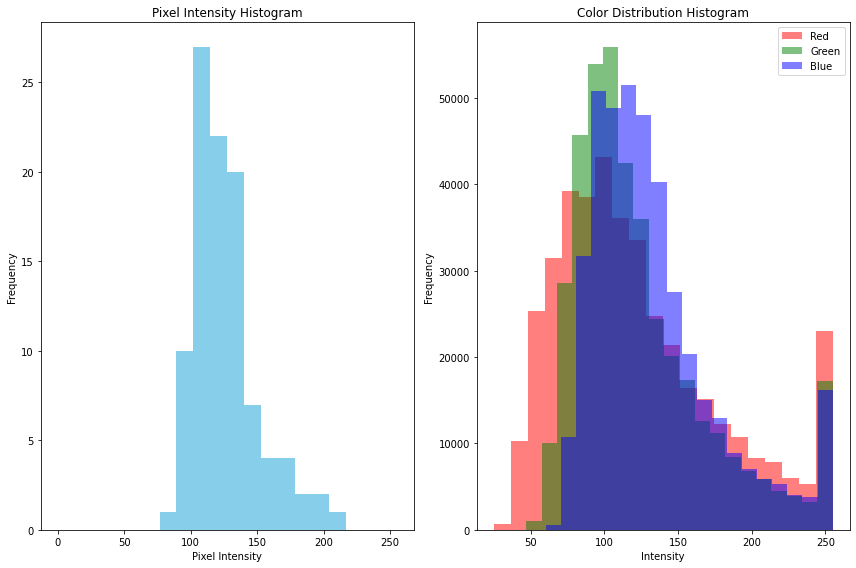

Image Label : Pasture


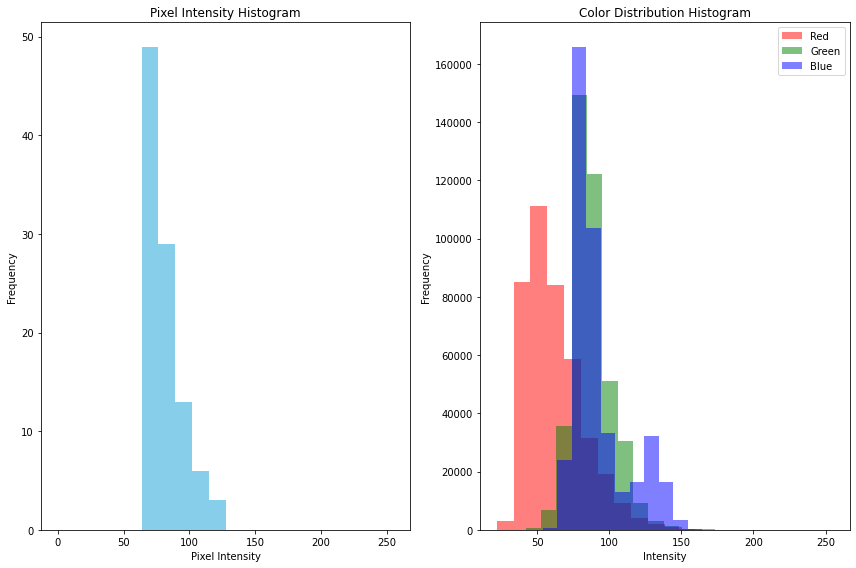

Image Label : Highway


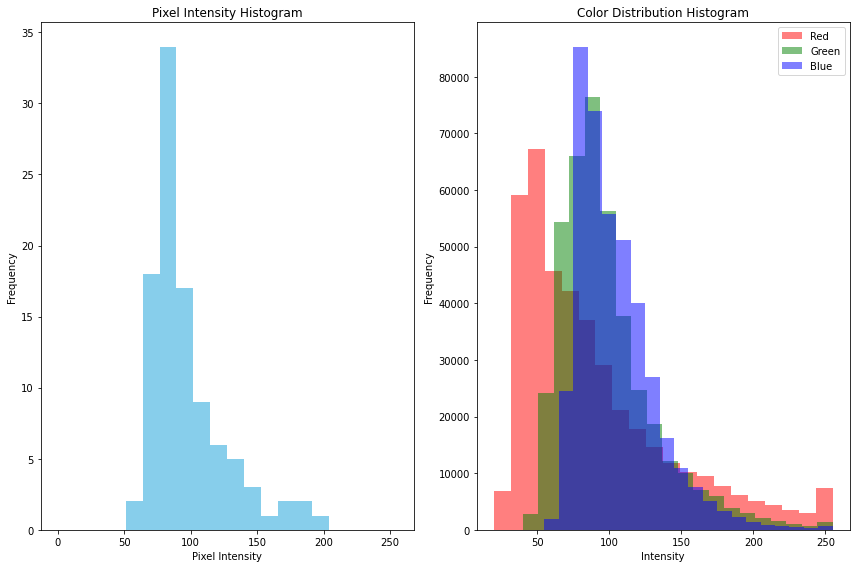

Image Label : Residential


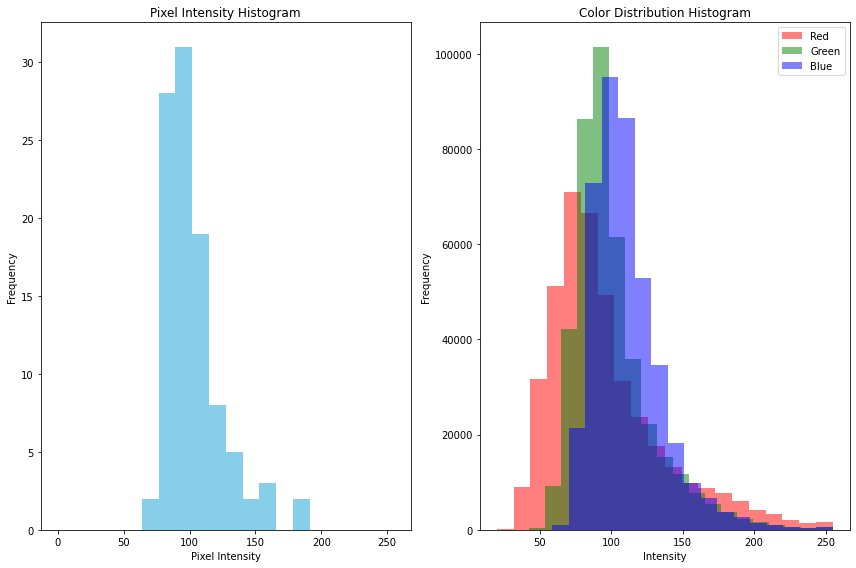

Image Label : River


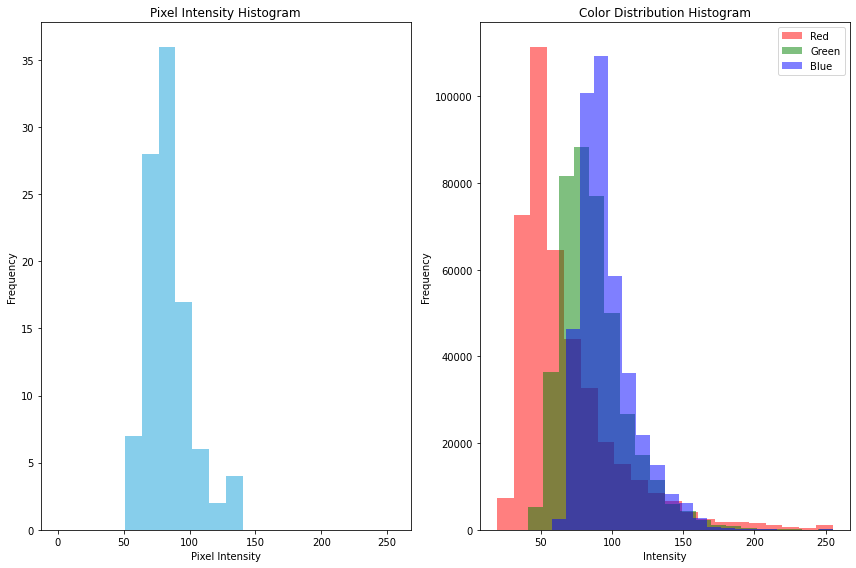

Image Label : SeaLake


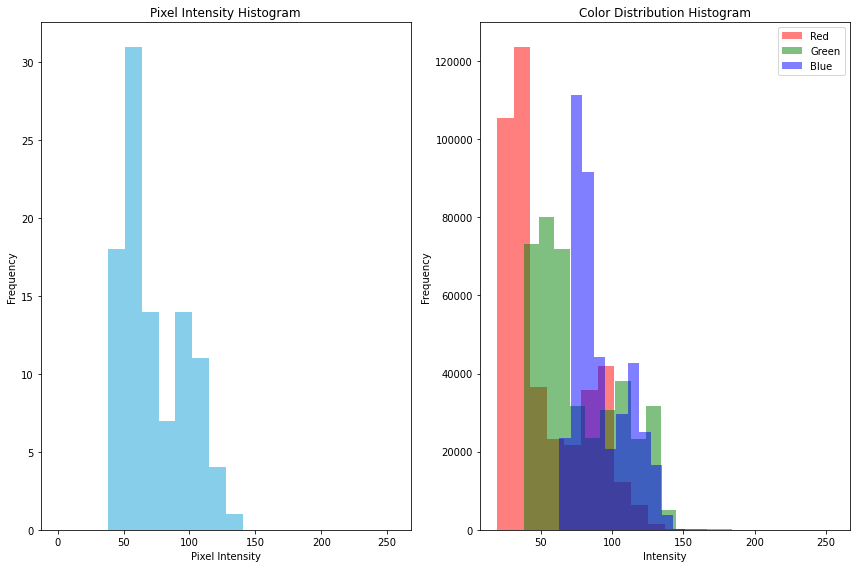

Image Label : Forest


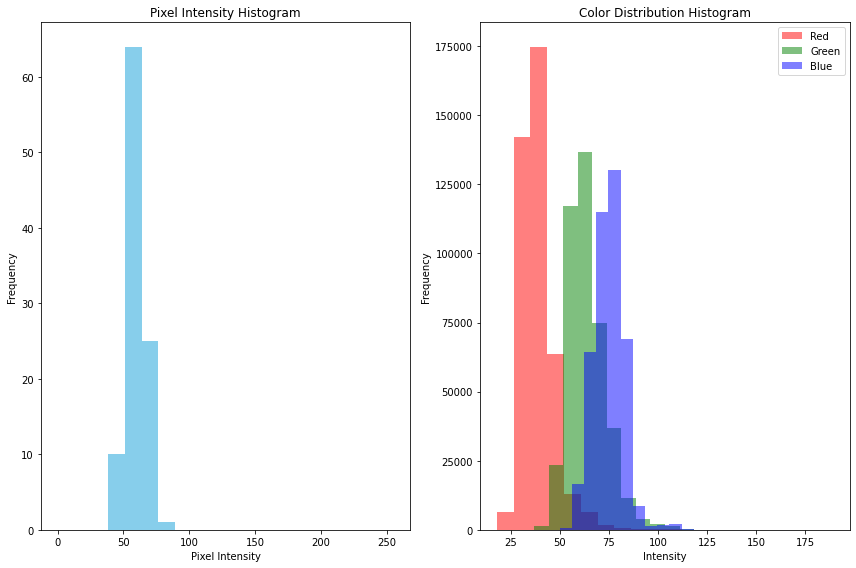

In [29]:
def load_images(image_paths, root_path):
    images = []
    for path in image_paths:
        image = cv2.imread(root_path+path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(image)
    return images

def calculate_image_properties(images):
    properties = []
    for image in images:
        height, width, channels = image.shape
        pixel_intensity = image.mean()  # Mean pixel intensity
        color_distribution = image.reshape(-1, 3)  # Reshape for easier analysis
        properties.append({
            'height': height,
            'width': width,
            'channels': channels,
            'pixel_intensity': pixel_intensity,
            'color_distribution': color_distribution
        })
    return properties

def visualize_image_properties(properties):
    # Plot histograms
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))
    
    # Plot pixel intensity histogram
    pixel_intensity = [prop['pixel_intensity'] for prop in properties]
    axes[0].hist(pixel_intensity, bins=20, range=(0,255),color='skyblue')
    axes[0].set_title('Pixel Intensity Histogram')
    axes[0].set_xlabel('Pixel Intensity')
    axes[0].set_ylabel('Frequency')

    
    # Plot color distributions
    color_distribution = np.vstack([prop['color_distribution'] for prop in properties])
    axes[1].hist(color_distribution[:, 0], bins=20, color='red', alpha=0.5, label='Red')
    axes[1].hist(color_distribution[:, 1], bins=20, color='green', alpha=0.5, label='Green')
    axes[1].hist(color_distribution[:, 2], bins=20, color='blue', alpha=0.5, label='Blue')
    axes[1].set_title('Color Distribution Histogram')
    axes[1].set_xlabel('Intensity')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    
    # Hide unused subplot
    # fig.delaxes(axes[1, 1])
    
    plt.tight_layout()
    plt.show()

img_sample = get_Sample(train_df,100)

for cls in img_sample.keys():
    print(f"Image Label : {cls}")
    image_paths = img_sample[cls]
    images = load_images(image_paths, 'EuroSAT/')
    image_properties = calculate_image_properties(images)
    visualize_image_properties(image_properties)


<b>Brightness</b> : Leftward shift in the Pixel Intensity (PI) histogram corresponds to a darker image. Rightward shift in the Pixel Intensity histogram corresponds to a brighter image. <br>
<b>Contrast</b> : A wider spread of the PI indicates higher contrast, while a narrow spread suggests lower contrast<br>
<b>Exposure</b> : Underexposed images tend to have a histogram shifted towards lower pixel intensities, while overexposed images have a histogram shifted towards higher pixel intensities. <br>
<b>Uniformity</b> :A uniformly distributed histogram suggests that the pixel intensities are evenly spread across the entire range, indicating a balanced distribution of brightness levels in the images. <br>

| Label | Brightness/Exposure | Contrast  | Uniformly Distributed|
|--------|------------|----------|----------|
| AnnualCrop| Normal| High | Yes | 
| HerbaceousVegetation| Normal | High |Yes | 
| PermanentCrop|Normal |High | Yes| 
| Industrial|Normal | High| Yes| 
| Pasture| Dark |Lower |Yes | 
| Highway|Normal | Normal| Yes| 
| Residential|Normal | High| No | 
| River|Normal |Normal | Yes| 
| SeaLake| Dark| Normal|Yes | 
| Forest| Dark| Lower | Yes | 


## 3. Image Metrics Analysis